# PCA 

In [4]:
# why ?
# dimensionality reduction through keeping the component with the most varience (most information) and ignore high correlated components

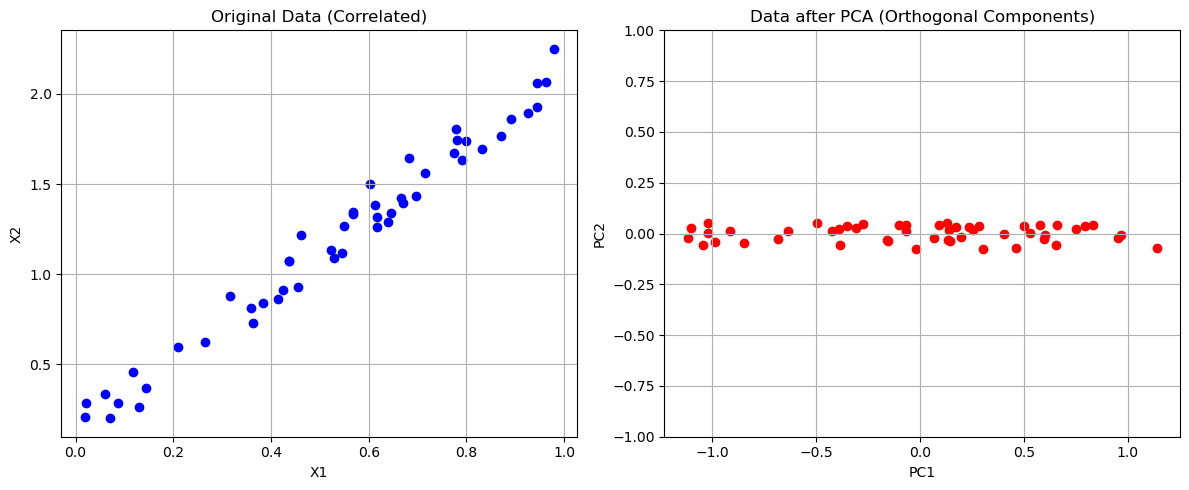

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Seed for reproducibility
np.random.seed(0)
# Create correlated data
x = np.random.rand(50)
y = 2*x + 0.3*np.random.rand(50)  # y correlated with x
X = np.column_stack((x, y))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Left subplot: Original Data
axes[0].scatter(X[:,0], X[:,1], color='blue')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Original Data (Correlated)')
axes[0].grid(True)

# Right subplot: Data after PCA
axes[1].scatter(X_pca[:,0], X_pca[:,1], color='red')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_ylim(-1,1)
axes[1].set_title('Data after PCA (Orthogonal Components)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

# note that PC2 has nearly no information so it can be neglected

In [50]:
#How to ?
#0 - preprocessing
df = pd.read_csv(r'Data/Housing.csv')
df = df.dropna()
df = df.replace({'yes':1, 'no':0, 'true':1, 'false':0,'furnished':1,'semi-furnished':0,'unfurnished':-1,})  #encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

C:\Users\afath\AppData\Local\Temp\ipykernel_7828\1618123051.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1, 'no':0, 'true':1, 'false':0,'furnished':1,'semi-furnished':0,'unfurnished':-1,})  #encoding


In [51]:
# 1 - getting correlation matrix for standardized data
corr_matrix = np.corrcoef(X_scaled.T)
# 2 - apply eigen decomposition to specify the new basis
eigval , eigvec = np.linalg.eig(corr_matrix)

In [48]:
# 3 - order eigen values in descending order to see whick componenet have most information
idx = np.argsort(eigval)[::-1]
eigenval = eigval[idx]
eigenvec = eigvec[:, idx]
explained_variance_ratio = eigenval / np.sum(eigenval)

In [49]:
# 4 - cumulative_variance to choose how many component will we use based on total information we need
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= .9) + 1
print(num_components)



10


In [10]:
# cons 
# we can't apply eigen decomposition for non square matrix that's why we calculate covariance matrix and work on it
# for too many-deatures